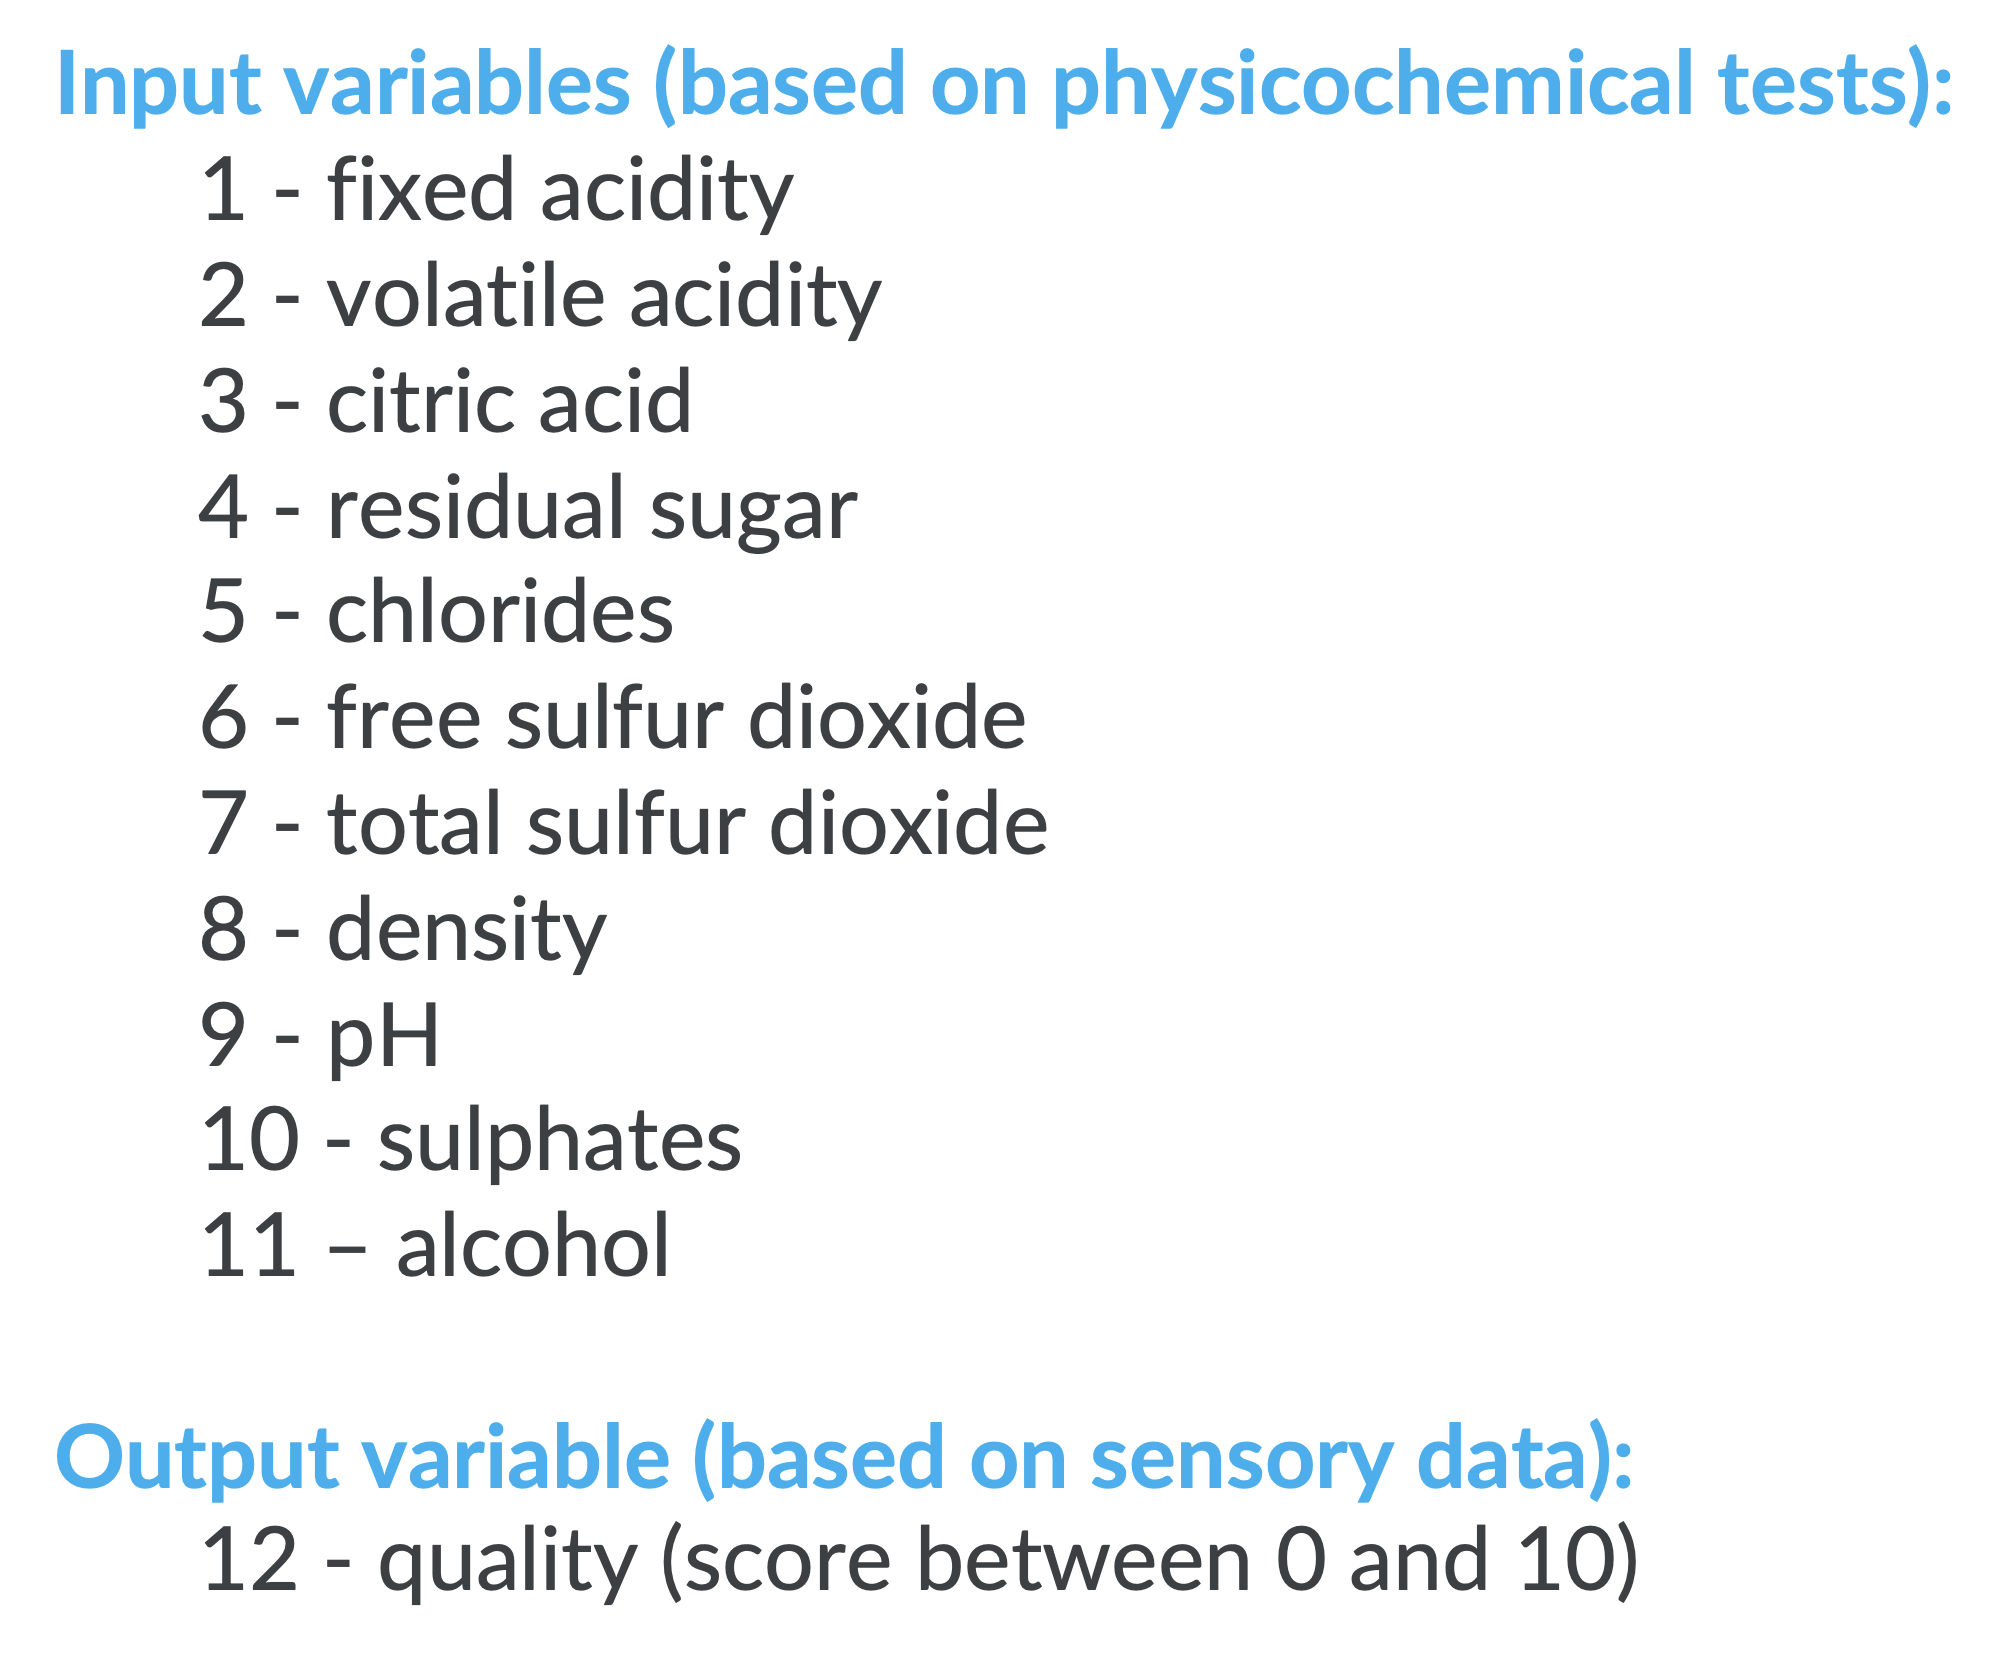

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
%matplotlib inline

In [2]:
wine = pd.read_csv('RedWineQuality.csv')
wine.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5


In [3]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


<Axes: xlabel='quality', ylabel='count'>

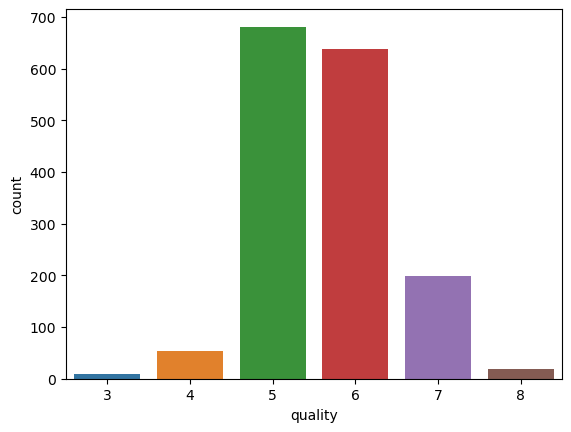

In [4]:
#count of the target variable
sns.countplot(x='quality', data=wine)

## Here we see that fixed acidity does not give any specification to classify the quality.

<Axes: xlabel='quality', ylabel='fixed acidity'>

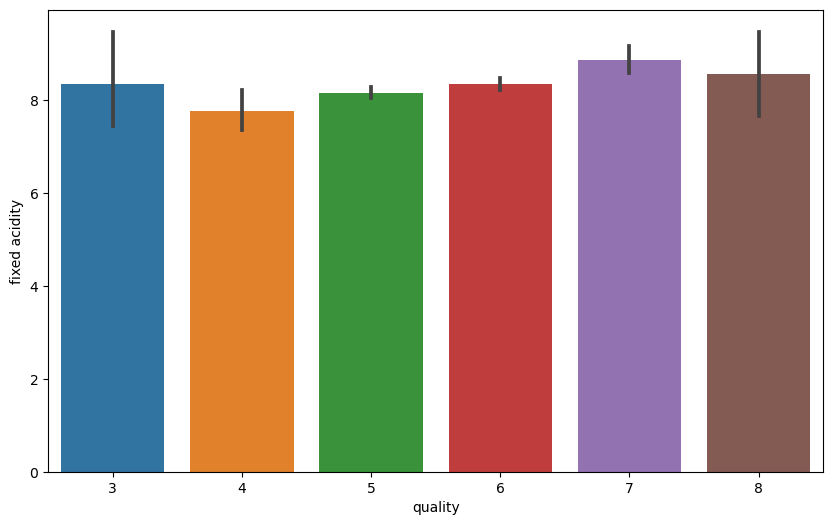

In [5]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'fixed acidity', data = wine)

## Here we see that its quite a downing trend in the volatile acidity as we go higher the quality 

<Axes: xlabel='quality', ylabel='volatile acidity'>

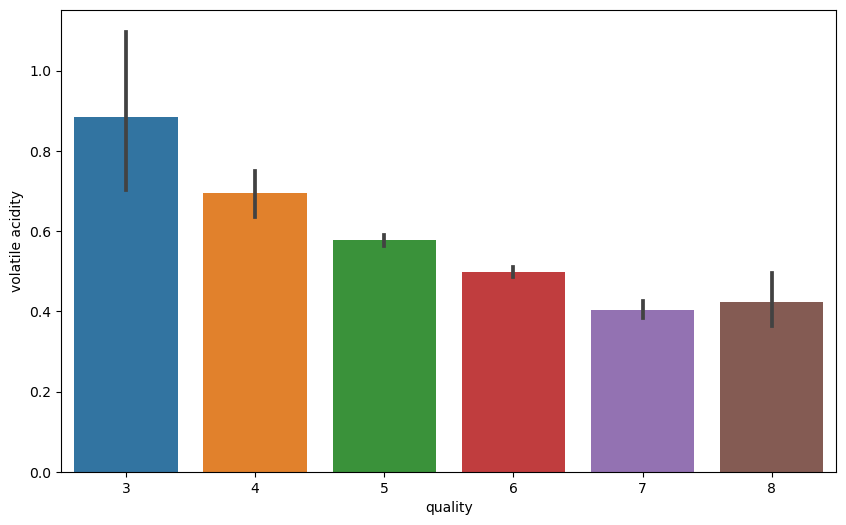

In [6]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'volatile acidity', data = wine)

## Composition of citric acid go higher as we go higher in the quality of the wine

<Axes: xlabel='quality', ylabel='citric acid'>

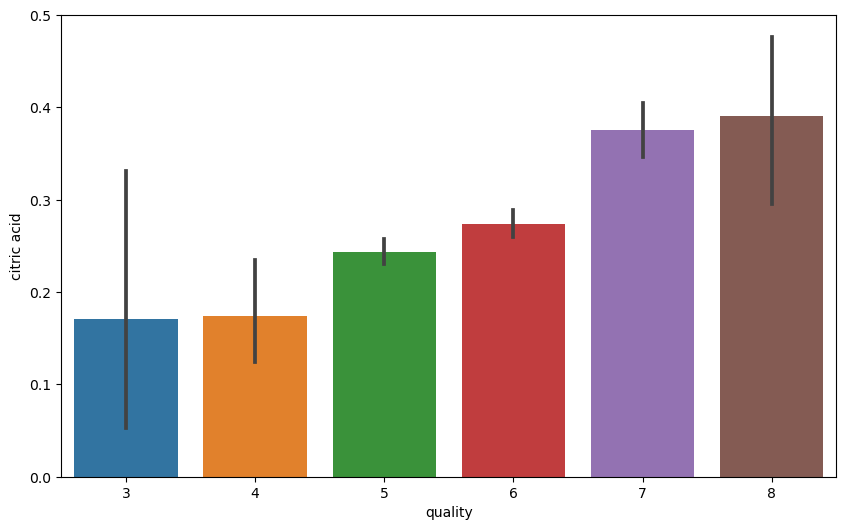

In [7]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'citric acid', data = wine)

<Axes: xlabel='quality', ylabel='citric acid'>

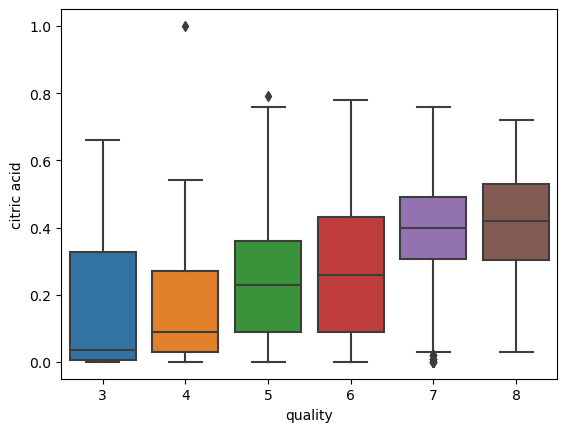

In [8]:
sns.boxplot(x='quality', y='citric acid', data = wine)

## residual sugar

<Axes: xlabel='quality', ylabel='residual sugar'>

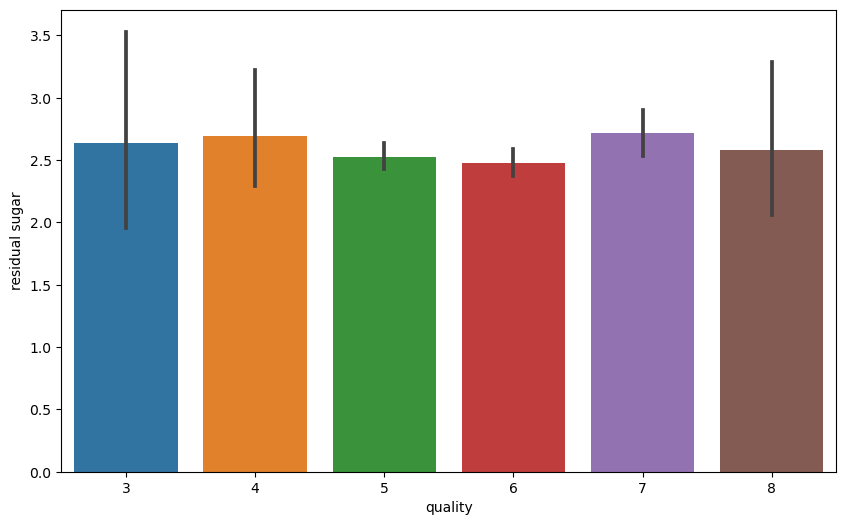

In [9]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'residual sugar', data = wine)

<Axes: xlabel='quality', ylabel='residual sugar'>

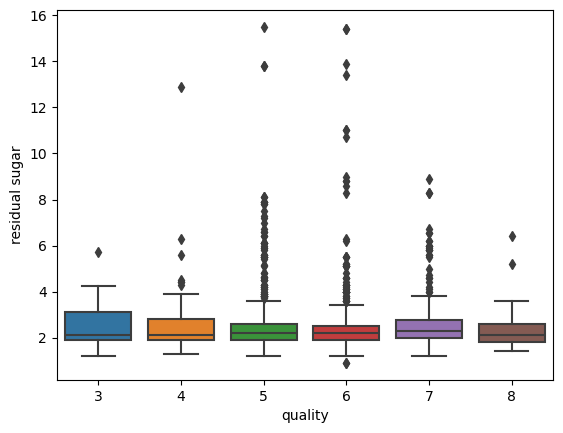

In [10]:
sns.boxplot(x='quality', y='residual sugar', data = wine)

## Composition of chloride also go down as we go higher in the quality of the wine

<Axes: xlabel='quality', ylabel='chlorides'>

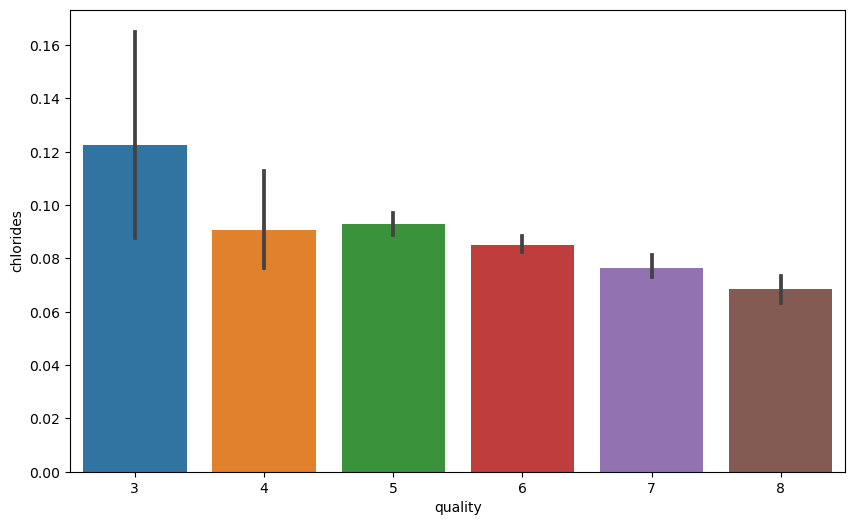

In [11]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'chlorides', data = wine)

## free sulfur dioxide

<Axes: xlabel='quality', ylabel='free sulfur dioxide'>

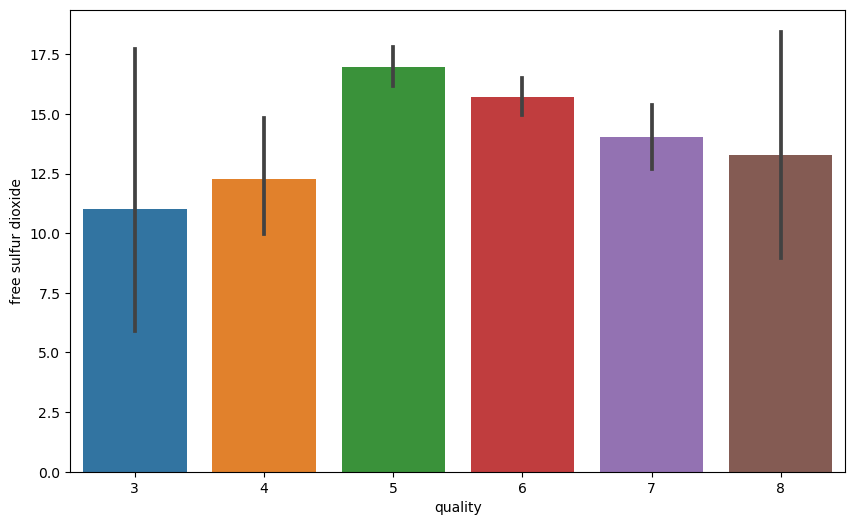

In [12]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'free sulfur dioxide', data = wine)

<Axes: xlabel='quality', ylabel='free sulfur dioxide'>

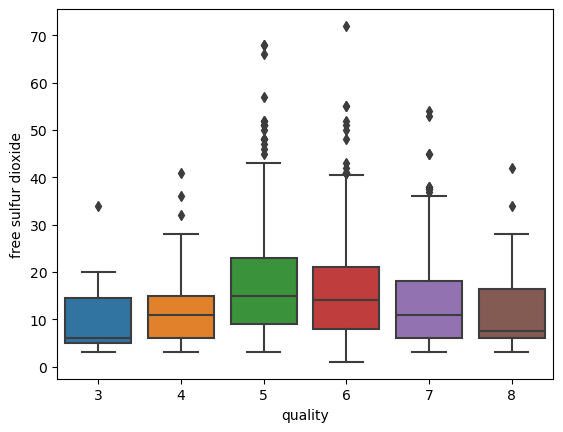

In [13]:
sns.boxplot(x='quality', y='free sulfur dioxide', data = wine)

## total sulfur dioxide

<Axes: xlabel='quality', ylabel='total sulfur dioxide'>

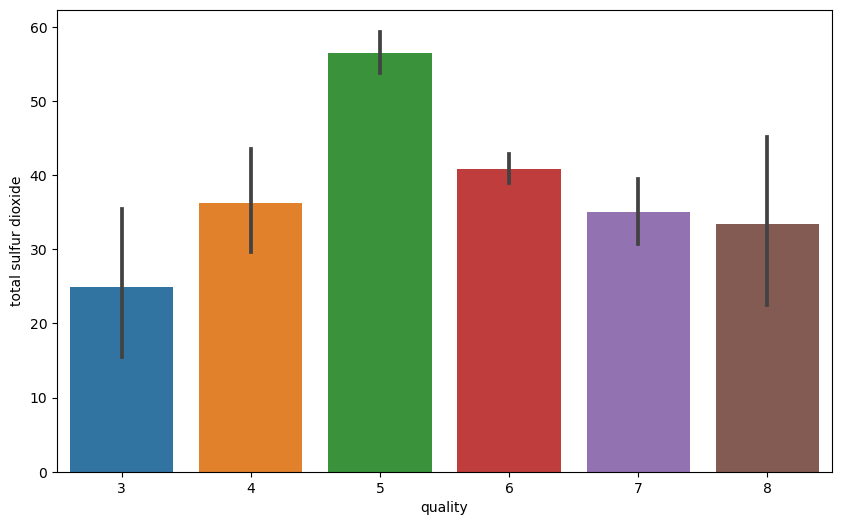

In [14]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'total sulfur dioxide', data = wine)

## Sulphates level goes higher with the quality of wine

<Axes: xlabel='quality', ylabel='sulphates'>

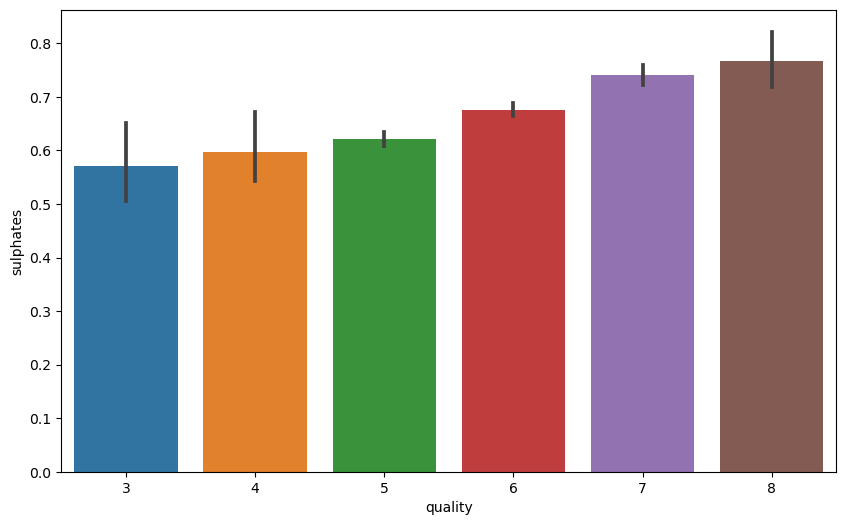

In [15]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'sulphates', data = wine)

## Alcohol level also goes higher as the quality of wine increases

<Axes: xlabel='quality', ylabel='alcohol'>

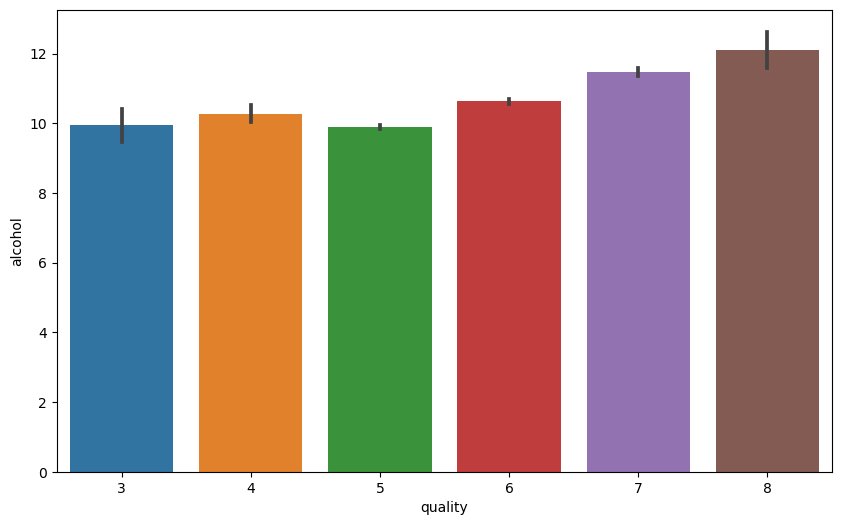

In [16]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'alcohol', data = wine)

## pH

<Axes: xlabel='quality', ylabel='pH'>

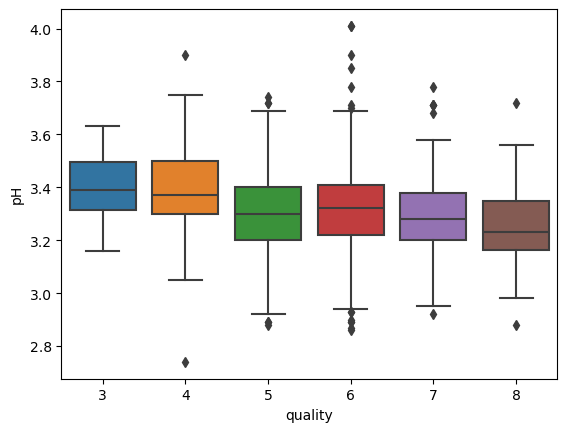

In [17]:
sns.boxplot(x='quality', y='pH', data = wine)

## density

<Axes: xlabel='quality', ylabel='density'>

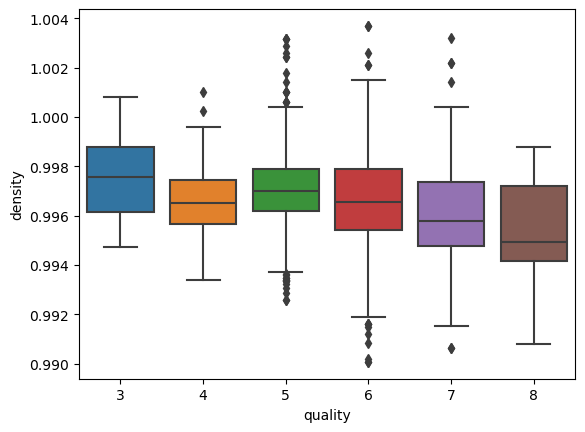

In [18]:
sns.boxplot(x='quality', y='density', data = wine)

## Preprocessing Data for performing Machine learning algorithms

In [19]:
#Making binary classificaion for the response variable.
#Dividing wine as good and bad by giving the limit for the quality
bins = (2, 6.5, 8)
group_names = ['bad', 'good']
wine['quality'] = pd.cut(wine['quality'], bins = bins, labels = group_names)

In [20]:
#Now lets assign a labels to our quality variable
label_quality = LabelEncoder()

In [21]:
#Bad becomes 0 and good becomes 1 
wine['quality'] = label_quality.fit_transform(wine['quality'])

In [22]:
wine['quality'].value_counts()

quality
0    1382
1     217
Name: count, dtype: int64

<Axes: xlabel='quality', ylabel='count'>

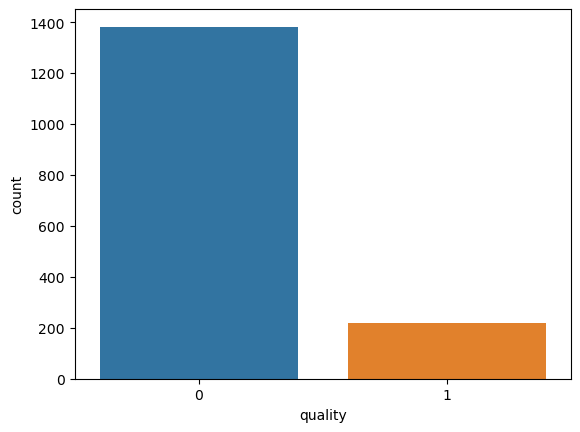

In [23]:
sns.countplot(x=wine['quality'])

In [24]:
#Now seperate the dataset as response variable and feature variabes
X = wine.drop('quality', axis = 1)
y = wine['quality']

In [25]:
#Train and Test splitting of data 
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                test_size = 0.2, random_state = 42)

In [26]:
#Applying Standard scaling to get optimized result
sc = StandardScaler()

In [27]:
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

## Random Forest Classifier

In [28]:
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)

In [29]:
#Let's see how our model performed
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93       273
           1       0.64      0.38      0.48        47

    accuracy                           0.88       320
   macro avg       0.77      0.67      0.71       320
weighted avg       0.86      0.88      0.86       320



#### Random forest gives the accuracy of 87%

## Random Forest using GridSearchCV

In [30]:
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [31]:
%%time
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)

CPU times: total: 60 s
Wall time: 2min 14s


GridSearchCV(cv=5, estimator=RandomForestClassifier(n_estimators=200),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [200, 500]})

In [32]:
CV_rfc.best_params_

{'criterion': 'entropy',
 'max_depth': 8,
 'max_features': 'log2',
 'n_estimators': 500}

In [33]:
rfc1=RandomForestClassifier(random_state=42, max_features='sqrt', 
                            n_estimators= 200, max_depth=8, criterion='gini')

In [34]:
rfc1.fit(X_train, y_train)

RandomForestClassifier(max_depth=8, n_estimators=200, random_state=42)

In [35]:
pred=rfc1.predict(X_test)

In [36]:
# the accuracy is slightly higher
from sklearn.metrics import accuracy_score
print("Accuracy for Random Forest on CV data: ",accuracy_score(y_test,pred))

Accuracy for Random Forest on CV data:  0.878125


## Support Vector Classifier

In [37]:
svc = SVC()
svc.fit(X_train, y_train)
pred_svc = svc.predict(X_test)

In [38]:
print(classification_report(y_test, pred_svc))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93       273
           1       0.71      0.26      0.37        47

    accuracy                           0.88       320
   macro avg       0.80      0.62      0.65       320
weighted avg       0.86      0.88      0.85       320



## Fine tune accuracy of models - Grid Search CV

In [39]:
#Finding best parameters for our SVC model
param = {
    'C': [0.1,0.8,0.9,1,1.1,1.2,1.3,1.4],
    'kernel':['linear', 'rbf'],
    'gamma' :[0.1,0.8,0.9,1,1.1,1.2,1.3,1.4]
}
grid_svc = GridSearchCV(svc, param_grid=param, scoring='accuracy', cv=10)

In [40]:
%%time
grid_svc.fit(X_train, y_train)

CPU times: total: 20.4 s
Wall time: 46.5 s


GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4],
                         'gamma': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4],
                         'kernel': ['linear', 'rbf']},
             scoring='accuracy')

In [41]:
#Best parameters for our svc model
grid_svc.best_params_

{'C': 1.2, 'gamma': 0.9, 'kernel': 'rbf'}

In [42]:
#Let's run our SVC again with the best parameters.
svc2 = SVC(C = 1.2, gamma =  0.9, kernel= 'rbf')
svc2.fit(X_train, y_train)
pred_svc2 = svc2.predict(X_test)
print(classification_report(y_test, pred_svc2))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94       273
           1       0.89      0.34      0.49        47

    accuracy                           0.90       320
   macro avg       0.89      0.67      0.72       320
weighted avg       0.90      0.90      0.88       320



# SVC improves from 86% to 90% using Grid Search CV

In [43]:
svc2.support_vectors_.shape

(910, 11)

In [44]:
svc2.support_vectors_

array([[-1.29016623, -1.78878251,  0.65275338, ..., -0.40043872,
        -0.40119696,  1.40827174],
       [ 0.27635078,  0.86181102, -0.06383064, ...,  0.05423824,
        -1.08873281, -0.96751578],
       [ 0.04427419,  2.81487994, -0.62686095, ...,  0.37900751,
        -0.9741435 , -0.49235828],
       ...,
       [ 1.6107912 , -0.61694116,  1.01104539, ..., -0.46539258,
         0.6301068 ,  1.59833474],
       [-0.07176411, -1.39816873,  0.65275338, ...,  0.1191921 ,
         0.22904422,  2.26355524],
       [-0.24582155, -1.84458448,  0.39683051, ...,  0.05423824,
         0.80199076,  1.40827174]])